成功解析 170 个epoch的训练记录
最后一个epoch的指标:
  Train Loss: 0.2192
  Val Loss:   0.2986
  AUC:        0.9478
  Accuracy:   0.9053
图表已保存至: training_metrics.png


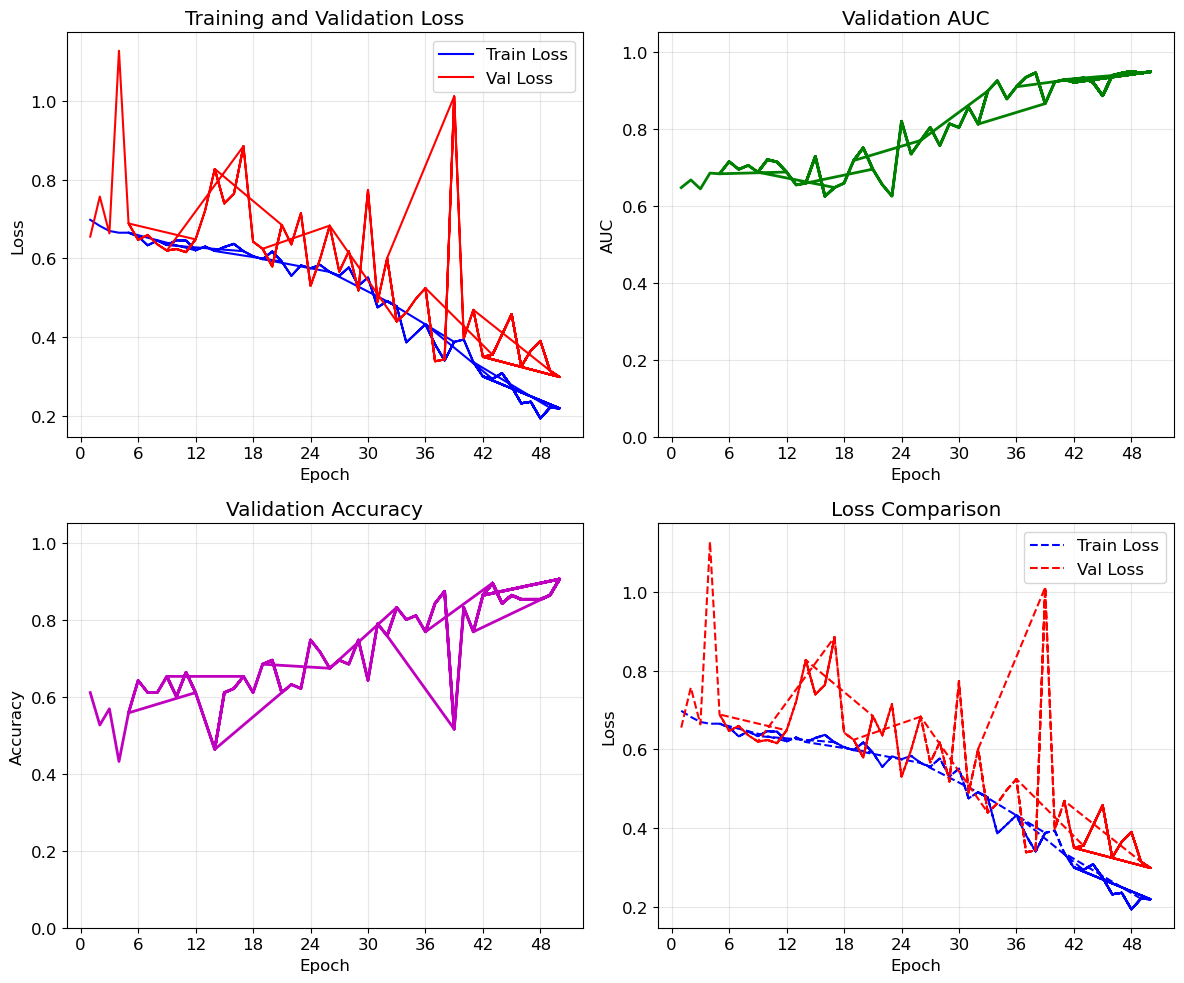

In [3]:
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def parse_training_log(file_path):
    """
    解析训练日志文件，提取训练指标
    返回包含所有epoch数据的字典列表
    """
    epoch_data = []
    
    # 匹配日志行的正则表达式模式
    pattern = re.compile(
        r"Epoch (\d+)/\d+ \| Time: [\d.]+s \| "
        r"Train Loss: ([\d.]+) \| "
        r"Val Loss: ([\d.]+) \| "
        r"AUC: ([\d.]+) \| Acc: ([\d.]+)"
    )

    with open(file_path, 'r') as f:
        for line in f:
            match = pattern.search(line)
            if match:
                epoch = int(match.group(1))
                train_loss = float(match.group(2))
                val_loss = float(match.group(3))
                auc = float(match.group(4))
                acc = float(match.group(5))
                
                epoch_data.append({
                    "epoch": epoch,
                    "train_loss": train_loss,
                    "val_loss": val_loss,
                    "auc": auc,
                    "acc": acc
                })
    
    return epoch_data

def plot_metrics(epoch_data, save_path=None):
    """
    绘制训练指标图表
    """
    epochs = [d["epoch"] for d in epoch_data]
    train_loss = [d["train_loss"] for d in epoch_data]
    val_loss = [d["val_loss"] for d in epoch_data]
    auc = [d["auc"] for d in epoch_data]
    acc = [d["acc"] for d in epoch_data]

    # 创建画布和子图
    plt.figure(figsize=(12, 10))
    plt.rcParams.update({'font.size': 12})

    # 绘制损失曲线
    plt.subplot(2, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r-', label='Val Loss')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # 强制显示整数刻度
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 绘制AUC曲线
    plt.subplot(2, 2, 2)
    plt.plot(epochs, auc, 'g-', linewidth=2)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.ylim(0, 1.05)
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('Validation AUC')
    plt.grid(True, alpha=0.3)

    # 绘制准确率曲线
    plt.subplot(2, 2, 3)
    plt.plot(epochs, acc, 'm-', linewidth=2)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.ylim(0, 1.05)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.grid(True, alpha=0.3)

    # 绘制损失对比曲线
    plt.subplot(2, 2, 4)
    plt.plot(epochs, train_loss, 'b--', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图表已保存至: {save_path}")
    else:
        plt.show()

# 使用示例 --------------------------------------------------
if __name__ == "__main__":
    # 配置参数
    log_file = rf"C:\Users\dongz\Desktop\Multimodal_AD\output\restnet3d-50-adcn.txt"  # 日志文件路径
    output_image = "training_metrics.png"  # 输出图片路径
    
    # 解析日志文件
    data = parse_training_log(log_file)
    
    # 检查是否成功解析到数据
    if not data:
        print("未找到有效训练记录，请检查日志文件格式")
    else:
        print(f"成功解析 {len(data)} 个epoch的训练记录")
        print("最后一个epoch的指标:")
        print(f"  Train Loss: {data[-1]['train_loss']:.4f}")
        print(f"  Val Loss:   {data[-1]['val_loss']:.4f}")
        print(f"  AUC:        {data[-1]['auc']:.4f}")
        print(f"  Accuracy:   {data[-1]['acc']:.4f}")
        
        # 绘制图表
        plot_metrics(data, save_path=output_image)